In [1]:
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
url = 'https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=51337&Year=2021&Month=7&Day=1&time=&timeframe=2&submit=Download+Data'
r = requests.get(url, allow_redirects=True)
open('pr.csv', 'wb').write(r.content)

64487

In [3]:
pr = pd.read_csv('pr.csv')

In [4]:
pr.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [5]:
pr_r = pr[['Month', 'Day', 'Total Precip (mm)', 'Max Temp (°C)', 'Min Temp (°C)']]
pr_r

,Month,Day,Total Precip (mm),Max Temp (°C),Min Temp (°C)
0,1,1,9.0,10.6,7.2
1,1,2,30.9,9.5,6.8
2,1,3,5.4,9.8,2.2
3,1,4,9.6,9.6,4.9
4,1,5,10.6,7.7,-0.1
...,...,...,...,...,...
360,12,27,4.2,-5.3,-9.3
361,12,28,0.2,NaN,NaN
362,12,29,1.0,-1.7,-7.0
363,12,30,13.0,0.6,-6.3


In [6]:
pr_r.columns

Index(['Month', 'Day', 'Total Precip (mm)', 'Max Temp (°C)', 'Min Temp (°C)'], dtype='object')

In [7]:
pr_r = pr_r.fillna(value=0)

In [8]:
TRAIN_INPUT = np.array(pr_r.drop('Total Precip (mm)', axis=1))
TRAIN_OUTPUT = np.array(pr_r['Total Precip (mm)'])

In [9]:
predictor = LinearRegression()
predictor.fit(X=TRAIN_INPUT, y=TRAIN_OUTPUT)

LinearRegression()

In [10]:
TRAIN_INPUT

array([[  1. ,   1. ,  10.6,   7.2],
       [  1. ,   2. ,   9.5,   6.8],
       [  1. ,   3. ,   9.8,   2.2],
       ...,
       [ 12. ,  29. ,  -1.7,  -7. ],
       [ 12. ,  30. ,   0.6,  -6.3],
       [ 12. ,  31. ,  -0.8, -11.8]])

In [11]:
predictor.predict(X=[[3, 25, 19, 5]])

array([-1.49910528])

In [14]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
df = pd.read_csv('/content/rainfalldata.csv')

In [16]:
df
#we have data of 32 years recorded monthly

,Date,precipitation,temperature,relative humidity,wind speed
0,1990-01-01,0.00,35.72,32.19,6.47
1,1990-02-01,0.00,37.78,31.25,6.55
2,1990-03-01,21.09,38.72,34.81,8.21
3,1990-04-01,0.00,43.05,26.44,8.55
4,1990-05-01,163.48,40.20,61.06,12.24
...,...,...,...,...,...
379,2021-08-01,172.51,30.73,84.81,9.72
380,2021-09-01,260.40,29.59,87.31,10.17
381,2021-10-01,101.75,29.65,84.88,6.49
382,2021-11-01,20.18,29.14,86.25,6.18


In [17]:
# converting the date values into dateime
train_dates = pd.to_datetime(df['Date'])

In [18]:
train_dates

,Date
0,1990-01-01
1,1990-02-01
2,1990-03-01
3,1990-04-01
4,1990-05-01
...,...
379,2021-08-01
380,2021-09-01
381,2021-10-01
382,2021-11-01


In [19]:
cols=list(df)[1:5] # except date

In [20]:
cols

['precipitation', 'temperature', 'relative humidity', 'wind speed']

In [21]:
#converting data into float values
training_df = df[cols].astype(float)

<Axes: >

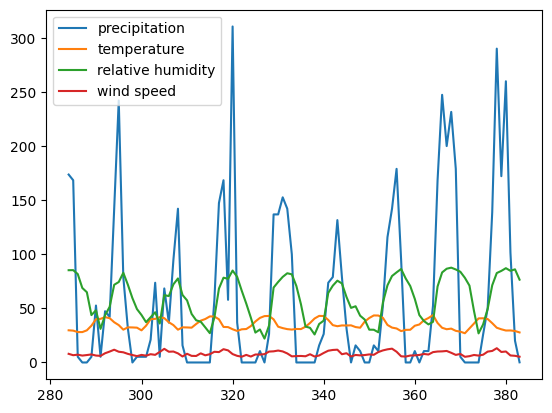

In [22]:
#plotting the last 100 values
plot_df = training_df.tail(100)
plot_df.plot.line()

In [23]:
#normalizing using Standar Scaler
scaler = StandardScaler()
scaler = scaler.fit(training_df)
training_df_scaled = scaler.transform(training_df)

In [24]:
trainX = []
trainY = []

In [25]:
n_past=20 #20 past values
n_fut = 1

In [26]:
# normalized values
training_df_scaled

array([[-0.79595023,  0.21372544, -1.32049151, -0.87260584],
       [-0.79595023,  0.52440457, -1.36668704, -0.8357164 ],
       [-0.53991428,  0.66617077, -1.19173374, -0.07026046],
       ...,
       [ 0.43931093, -0.70172229,  1.2689157 , -0.86338348],
       [-0.55096182, -0.778638  ,  1.33624324, -1.00633007],
       [-0.7941292 , -0.9762058 ,  0.86642481, -1.39366922]])

In [27]:
#Adding the values to trainX and trainY lists
for i in range(n_past, len(training_df_scaled) - n_fut +1):
    trainX.append(training_df_scaled[i - n_past:i, 0:training_df.shape[1]]) # rows i-n_past to i, columns from first dimension of df
    trainY.append(training_df_scaled[i + n_fut - 1:i + n_fut, 0])


The presence of -1 in the future values (i + n_fut - 1) but not in the past values (i - n_past) reflects how we define and extract time horizons for supervised learning in time series forecasting. Here's the reasoning:

1. Context:
Past Values (trainX): Used as input features.
Future Value (trainY): Target to be predicted.
General Setup
We want the input (trainX) to contain n_past consecutive past time steps.
We want the target (trainY) to correspond to the value at a specific future time step (or range of steps for multistep forecasting).
2. Why No -1 for Past Values?
When slicing past values for trainX:


training_df_scaled[i - n_past:i, 0:training_df.shape[1]]

i - n_past:i specifies a slice starting from i - n_past and ending just before i.
This aligns with Python slicing, where the ending index is exclusive.
As a result, the range covers exactly n_past time steps.
The starting index (i - n_past) ensures we include all the desired past values up to i - 1 without needing additional adjustments.
3. Why -1 for Future Values?
When slicing future values for trainY:


training_df_scaled[i + n_fut - 1:i + n_fut, 0]

i + n_fut - 1 identifies the specific future time step we want to predict, relative to the current position i.
The slice ends at i + n_fut (exclusive), so the actual included index is i + n_fut - 1.
Key Point:
The -1 is necessary to:

Correct for the exclusive slicing rule in Python, ensuring that the value at i + n_fut - 1 is included.
Pinpoint the exact time step of interest when predicting a specific future value.
4. Why This Difference?
The difference arises because:

For past values (trainX), you are slicing a range of inputs (n_past steps).
For future values (trainY), you are selecting a single step (or starting a future slice for multistep forecasting).
Without the -1, the code would reference the wrong future time step (i + n_fut instead of i + n_fut - 1), shifting your targets by one index.

5. Summary of Slicing
Purpose	Range/Index	Explanation
Past (Input)	i - n_past:i	Includes the past n_past steps ending just before i.
Future (Target)	i + n_fut - 1:i + n_fut	Includes the specific future time step at i + n_fut - 1, correcting for Python's exclusive slicing.
Example
If n_past = 3 and n_fut = 2:

Past Values (trainX): From i-3 to i-1 (3 values).
Future Value (trainY): Single value at i+1 (via i + 2 - 1).

In [28]:
# Converting into numpy arrays
trainX, trainY = np.array(trainX), np.array(trainY)

In [29]:
trainX

array([[[-0.79595023,  0.21372544, -1.32049151, -0.87260584],
        [-0.79595023,  0.52440457, -1.36668704, -0.8357164 ],
        [-0.53991428,  0.66617077, -1.19173374, -0.07026046],
        ...,
        [ 1.57283756, -3.19469609,  0.57450834,  2.19382909],
        [ 0.80460831, -3.36662532,  1.13327775,  1.66815453],
        [ 1.44475888, -3.6757963 ,  1.19814808,  0.72286256]],

       [[-0.79595023,  0.52440457, -1.36668704, -0.8357164 ],
        [-0.53991428,  0.66617077, -1.19173374, -0.07026046],
        [-0.79595023,  1.31920021, -1.60307058,  0.08651967],
        ...,
        [ 0.80460831, -3.36662532,  1.13327775,  1.66815453],
        [ 1.44475888, -3.6757963 ,  1.19814808,  0.72286256],
        [ 0.86858695, -4.25191003,  1.04137812, -1.03860833]],

       [[-0.53991428,  0.66617077, -1.19173374, -0.07026046],
        [-0.79595023,  1.31920021, -1.60307058,  0.08651967],
        [ 1.18872293,  0.88937714,  0.09830117,  1.78804522],
        ...,
        [ 1.44475888, -3.67

In [30]:
trainY

array([[ 0.86858695],
       [-0.34785697],
       [-0.47581424],
       [-0.79595023],
       [-0.79595023],
       [-0.79595023],
       [-0.79595023],
       [-0.73197159],
       [-0.28375693],
       [ 0.67652963],
       [ 0.54845096],
       [ 2.34106681],
       [ 0.29241501],
       [-0.34785697],
       [ 0.16433633],
       [-0.79595023],
       [-0.79595023],
       [-0.79595023],
       [-0.79595023],
       [-0.60389291],
       [-0.66787155],
       [-0.02772098],
       [ 1.31668021],
       [ 1.50873752],
       [ 0.74050827],
       [ 0.42049368],
       [-0.79595023],
       [-0.4118356 ],
       [-0.66787155],
       [-0.66787155],
       [-0.79595023],
       [-0.53991428],
       [-0.79595023],
       [ 0.22843637],
       [ 0.74050827],
       [ 1.57283756],
       [-0.28375693],
       [ 1.82887351],
       [-0.47581424],
       [-0.79595023],
       [-0.28375693],
       [-0.79595023],
       [-0.28375693],
       [-0.73197159],
       [-0.02772098],
       [ 0

In [31]:
print('trainX shape == {}'.format(trainX.shape)) # 364, 20, 4 means there are 364 windows(groups) of 20*4
print('trainY shape == {}'.format(trainY.shape)) # there are 364 values from previous values

trainX shape == (364, 20, 4)
trainY shape == (364, 1)


In [32]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(16, activation='relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(trainY.shape[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


return_sequences=True:

Outputs the hidden state for every time step in the sequence.
Resulting output shape: (batch_size, timesteps, units).
Use Case:
When stacking multiple LSTM layers: Subsequent layers need the entire sequence to process it step-by-step.
Tasks where output at each time step is important, e.g., sequence-to-sequence models, video or audio processing, or extracting features from each time step.


In [34]:
#optimizer used is adam with loss function mse(Mean Squared Error)
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 20, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,073 (519.82 KB)

 Trainable params: 133,073 (519.82 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#Fitting the model
history=model.fit(trainX,trainY,epochs=30,batch_size=5,validation_split=0.2,verbose=1)

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 1.1124 - val_loss: 0.9867
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.1648 - val_loss: 0.9550
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 1.0297 - val_loss: 0.9307
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.7661 - val_loss: 0.9173
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.9140 - val_loss: 0.6460
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.6094 - val_loss: 0.4670
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.7094 - val_loss: 0.4661
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.6496 - val_loss: 0.4401
Epoch 9/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3905 - val_loss: 0.4506
Epoch 10/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4185 - val_loss: 0.5377
Epoch 11/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.6263 - val_loss: 0.3769
Epoch 12/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.

In [36]:
n_fut=36#We need to predict next 36 months from the given date,2022-01-01
forecast_dates=pd.date_range(list(train_dates)[-1],periods=n_fut,freq='1m').tolist()

<ipython-input-36-d36c679fe490>:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates=pd.date_range(list(train_dates)[-1],periods=n_fut,freq='1m').tolist()


In [37]:
#Next 36 months are
forecast_dates

[Timestamp('2021-12-31 00:00:00'),
 Timestamp('2022-01-31 00:00:00'),
 Timestamp('2022-02-28 00:00:00'),
 Timestamp('2022-03-31 00:00:00'),
 Timestamp('2022-04-30 00:00:00'),
 Timestamp('2022-05-31 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-07-31 00:00:00'),
 Timestamp('2022-08-31 00:00:00'),
 Timestamp('2022-09-30 00:00:00'),
 Timestamp('2022-10-31 00:00:00'),
 Timestamp('2022-11-30 00:00:00'),
 Timestamp('2022-12-31 00:00:00'),
 Timestamp('2023-01-31 00:00:00'),
 Timestamp('2023-02-28 00:00:00'),
 Timestamp('2023-03-31 00:00:00'),
 Timestamp('2023-04-30 00:00:00'),
 Timestamp('2023-05-31 00:00:00'),
 Timestamp('2023-06-30 00:00:00'),
 Timestamp('2023-07-31 00:00:00'),
 Timestamp('2023-08-31 00:00:00'),
 Timestamp('2023-09-30 00:00:00'),
 Timestamp('2023-10-31 00:00:00'),
 Timestamp('2023-11-30 00:00:00'),
 Timestamp('2023-12-31 00:00:00'),
 Timestamp('2024-01-31 00:00:00'),
 Timestamp('2024-02-29 00:00:00'),
 Timestamp('2024-03-31 00:00:00'),
 Timestamp('2024-04-

In [38]:
from datetime import timedelta,date
#Since the days are end of the month we will add 1 day to each
fd=[]
for i in range(len(forecast_dates)):
    dr =pd.to_datetime(forecast_dates[i])+pd.DateOffset(days=1)
    fd.append(dr)

In [39]:
#new dates from 2022-01-01
fd

[Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-01 00:00:00'),
 Timestamp('2023-04-01 00:00:00'),
 Timestamp('2023-05-01 00:00:00'),
 Timestamp('2023-06-01 00:00:00'),
 Timestamp('2023-07-01 00:00:00'),
 Timestamp('2023-08-01 00:00:00'),
 Timestamp('2023-09-01 00:00:00'),
 Timestamp('2023-10-01 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-01-01 00:00:00'),
 Timestamp('2024-02-01 00:00:00'),
 Timestamp('2024-03-01 00:00:00'),
 Timestamp('2024-04-01 00:00:00'),
 Timestamp('2024-05-

In [40]:
#Every window(slide) of 20 size will look like
trainX[-1:]

array([[[-0.66787155,  1.0356678 , -1.17011029, -0.46221079],
        [-0.15579965,  1.44739305, -1.05363857,  0.56608243],
        [ 1.25270157,  0.34191828,  0.55632499,  0.82430853],
        [ 2.21298813, -0.32920897,  1.19519942,  0.88886505],
        [ 1.63681619, -0.53130122,  1.36376399,  1.06408991],
        [ 2.02093082, -0.4453366 ,  1.41290817,  0.27096689],
        [ 1.38078025, -0.75450758,  1.3298545 , -0.61899092],
        [-0.73197159, -0.87214337,  1.22566882, -0.21320705],
        [-0.79595023, -1.08931713,  0.94947849, -1.43055866],
        [-0.79595023, -0.41366543,  0.59613179, -1.1631102 ],
        [-0.79595023,  0.26801888, -0.5621967 , -0.65126918],
        [-0.79595023,  0.98439066, -1.57849849, -0.91410646],
        [-0.48139871,  0.99947217, -1.17011029, -0.53598967],
        [-0.18457183,  0.89390159, -0.46390833,  0.78280791],
        [ 0.89323147,  0.31627971,  0.61136648,  1.07331227],
        [ 2.73210132, -0.32317636,  1.16718724,  2.23071854],
        

In [41]:
#Based on the last 36 trainX values(windows) next 36 months rainfall will be predicted
forecast=model.predict(trainX[-n_fut:])

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step   


In [42]:
#Predicted forecast values are
np.array(forecast)

array([[-0.5869077 ],
       [-0.558975  ],
       [-0.428352  ],
       [-0.2837472 ],
       [-0.05980977],
       [ 0.34749848],
       [ 1.32463   ],
       [ 1.2156317 ],
       [ 0.77610844],
       [ 0.19520885],
       [-0.19414268],
       [-0.46249586],
       [-0.4271906 ],
       [-0.4203927 ],
       [-0.2777921 ],
       [-0.10808966],
       [ 0.2295897 ],
       [ 1.0126816 ],
       [ 0.97852075],
       [ 1.0396807 ],
       [ 0.8005405 ],
       [-0.24543716],
       [-0.6586856 ],
       [-0.69869095],
       [-0.67722064],
       [-0.6933951 ],
       [-0.6665517 ],
       [-0.6494046 ],
       [-0.5791719 ],
       [-0.18201403],
       [ 0.6530601 ],
       [ 1.0111817 ],
       [ 0.54933846],
       [ 0.04934476],
       [-0.7147761 ],
       [-0.8208535 ]], dtype=float32)

In [43]:
training_df.shape

(384, 4)

In [45]:
#Since the forecast values are normalized form we need to convert that intlo original form.
forecast_copy=np.repeat(np.array(forecast),training_df.shape[1],axis=1)#Dummy values has to be created to convert to original form
#true_copy=np.repeat(np.array(trainY),training_df.shape[1],axis=1)
fut_pred=scaler.inverse_transform(forecast_copy)[:,0]
#fut_true=scalar.inverse_transform(true_copy)[:,0]

In [46]:
#Predictions are
fut_pred

array([ 17.219093 ,  19.519947 ,  30.279526 ,  42.1908   ,  60.636806 ,
        94.187294 , 174.67484  , 165.69652  , 129.49243  ,  81.643005 ,
        49.571636 ,  27.467052 ,  30.37519  ,  30.935143 ,  42.68133  ,
        56.65993  ,  84.475    , 148.97926  , 146.16539  , 151.2032   ,
       131.50493  ,  45.346447 ,  11.306656 ,   8.011368 ,   9.779903 ,
         8.447594 ,  10.658718 ,  12.071148 ,  17.8563   ,  50.57069  ,
       119.35678  , 148.85571  , 110.8131   ,  69.628    ,   6.6864123,
        -2.0513117], dtype=float32)

In [47]:
#Dataframe for date with predicted values
df_forecast=pd.DataFrame({'Date':np.array(fd),'precipitation':fut_pred})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [48]:
#Already available data(original)
org=df[['Date','precipitation']]
org['Date'] =pd.to_datetime(org['Date'])
org=org.loc[org['Date']>='2019-05-01']

<ipython-input-48-a7ce1e7a08a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  org['Date'] =pd.to_datetime(org['Date'])


In [49]:
#Orginal values with dates from 2019-05-01(yyyy-mm-dd)
org

,Date,precipitation
352,2019-05-01,10.55
353,2019-06-01,52.73
354,2019-07-01,116.02
355,2019-08-01,142.38
356,2019-09-01,179.30
357,2019-10-01,94.92
358,2019-11-01,0.00
359,2019-12-01,0.00
360,2020-01-01,10.55
361,2020-02-01,0.00


In [50]:
#Forecast values
df_forecast

,Date,precipitation
0,2022-01-01,17.219093
1,2022-02-01,19.519947
2,2022-03-01,30.279526
3,2022-04-01,42.190800
4,2022-05-01,60.636806
5,2022-06-01,94.187294
6,2022-07-01,174.674835
7,2022-08-01,165.696518
8,2022-09-01,129.492432
9,2022-10-01,81.643005


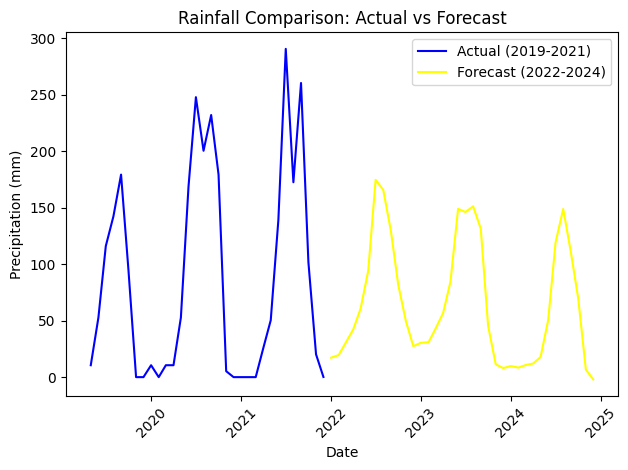

In [54]:
#plotting the last years rainfall(2019,2020,2021) in blue and next years rainfall(2022-2023-2024) in yellow
sns.lineplot(x='Date', y='precipitation', data=org, color='blue', label='Actual (2019-2021)')
sns.lineplot(x='Date', y='precipitation', data=df_forecast, color='yellow', label='Forecast (2022-2024)')
plt.legend()
plt.title('Rainfall Comparison: Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
#Predictions for 12 months of 2021 year
n_fut_21=12
forecast_dates_2021=pd.date_range(list(train_dates)[-13],periods=n_fut_21,freq='1m').tolist()

<ipython-input-55-297375e50572>:3: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates_2021=pd.date_range(list(train_dates)[-13],periods=n_fut_21,freq='1m').tolist()


In [56]:
#Dates from 2021 are
forecast_dates_2021

[Timestamp('2020-12-31 00:00:00'),
 Timestamp('2021-01-31 00:00:00'),
 Timestamp('2021-02-28 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2021-04-30 00:00:00'),
 Timestamp('2021-05-31 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-31 00:00:00'),
 Timestamp('2021-08-31 00:00:00'),
 Timestamp('2021-09-30 00:00:00'),
 Timestamp('2021-10-31 00:00:00'),
 Timestamp('2021-11-30 00:00:00')]

In [57]:
#Adding 1 day
fd_21=[]
for i in range(len(forecast_dates_2021)):
    dr =pd.to_datetime(forecast_dates_2021[i])+pd.DateOffset(days=1)
    fd_21.append(dr)

In [58]:
#Days from 2021-01-01
fd_21

[Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00')]

In [59]:
#Predicting the 2021 rainfall
forecast21=model.predict(trainX[-n_fut_21-12:-n_fut_21])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


In [60]:
np.array(forecast21)

array([[-0.4271906 ],
       [-0.4203927 ],
       [-0.2777921 ],
       [-0.10808966],
       [ 0.2295897 ],
       [ 1.0126816 ],
       [ 0.97852075],
       [ 1.0396807 ],
       [ 0.8005405 ],
       [-0.24543716],
       [-0.6586856 ],
       [-0.69869095]], dtype=float32)

In [61]:
#orginal rainfall values of 2021
trainY[-n_fut_21:]

array([[-0.79595023],
       [-0.79595023],
       [-0.79595023],
       [-0.48139871],
       [-0.18457183],
       [ 0.89323147],
       [ 2.73210132],
       [ 1.29834857],
       [ 2.36534712],
       [ 0.43931093],
       [-0.55096182],
       [-0.7941292 ]])

In [63]:
#Normalized form will be converted to orginal form
forecast_copy_21=np.repeat(np.array(forecast21),training_df.shape[1],axis=1)
#true_copy=np.repeat(np.array(trainY),training_df.shape[1],axis=1)
fut_pred_21=scaler.inverse_transform(forecast_copy_21)[:,0]
#fut_true=scalar.inverse_transform(true_copy)[:,0]

In [65]:
#Converting the trainY values from normalized form to orginal form
forecast_copy_Y=np.repeat(np.array(trainY[-n_fut_21:]),training_df.shape[1],axis=1)
#true_copy=np.repeat(np.array(trainY),training_df.shape[1],axis=1)
fut_pred_Y=scaler.inverse_transform(forecast_copy_Y)[:,0]
#fut_true=scalar.inverse_transform(true_copy)[:,0]

In [66]:
#Y true values are
Y_true=fut_pred_Y.flatten()

In [67]:
Y_true

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 2.5910e+01, 5.0360e+01,
       1.3914e+02, 2.9061e+02, 1.7251e+02, 2.6040e+02, 1.0175e+02,
       2.0180e+01, 1.5000e-01])

In [68]:
#Dataframe with dates from 2021(12 months) true values and predicted values
df_forecast_21=pd.DataFrame({'Date':np.array(fd_21),'true':Y_true,'precipitation':fut_pred_21})
df_forecast_21['Date']=pd.to_datetime(df_forecast_21['Date'])

In [69]:
#Displaying the values
df_forecast_21

,Date,true,precipitation
0,2021-01-01,0.00,30.375191
1,2021-02-01,0.00,30.935143
2,2021-03-01,0.00,42.681332
3,2021-04-01,25.91,56.659931
4,2021-05-01,50.36,84.474998
5,2021-06-01,139.14,148.979263
6,2021-07-01,290.61,146.165390
7,2021-08-01,172.51,151.203201
8,2021-09-01,260.40,131.504929
9,2021-10-01,101.75,45.346447


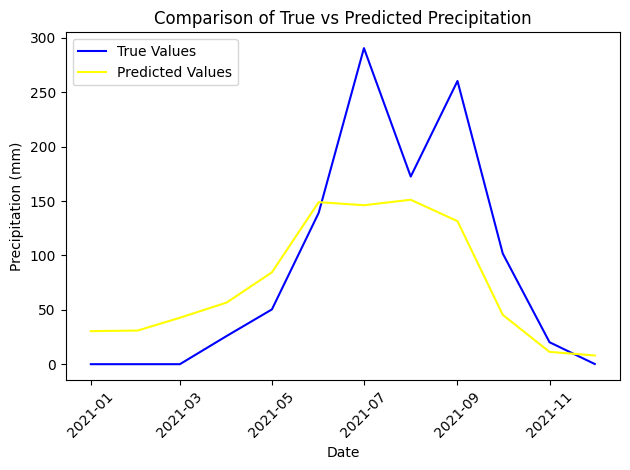

In [72]:
# Correct way to use sns.lineplot with keyword arguments
sns.lineplot(x='Date', y='true', data=df_forecast_21, color='blue', label='True Values')
sns.lineplot(x='Date', y='precipitation', data=df_forecast_21, color='yellow', label='Predicted Values')

# Add visualization enhancements
plt.legend()
plt.title('Comparison of True vs Predicted Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()

In [73]:
forecast=model.predict(trainX[:])

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [74]:
np.array(forecast)

array([[ 0.29350567],
       [-0.27637798],
       [-0.6272727 ],
       [-0.7004089 ],
       [-0.76097006],
       [-0.7356916 ],
       [-0.6847034 ],
       [-0.6118117 ],
       [-0.38572353],
       [-0.02525495],
       [ 0.9599749 ],
       [ 1.0334038 ],
       [ 0.5152307 ],
       [ 0.13567735],
       [-0.2269557 ],
       [-0.47316664],
       [-0.6200035 ],
       [-0.73585707],
       [-0.6511627 ],
       [-0.57221115],
       [-0.10124481],
       [ 0.3807379 ],
       [ 0.66021264],
       [ 0.95541316],
       [ 0.7538971 ],
       [ 0.09107012],
       [-0.5059498 ],
       [-0.5852668 ],
       [-0.6077295 ],
       [-0.6018459 ],
       [-0.5609832 ],
       [-0.45937628],
       [-0.06920019],
       [ 0.37635073],
       [ 0.62958205],
       [ 1.2313688 ],
       [ 0.54729193],
       [ 0.00544392],
       [-0.5442752 ],
       [-0.62407416],
       [-0.6360662 ],
       [-0.64606255],
       [-0.5673116 ],
       [-0.4986179 ],
       [-0.29883593],
       [ 0

In [76]:
#Normalized form will be converted to orginal form
forecast_copy_t=np.repeat(np.array(forecast),training_df.shape[1],axis=1)
#true_copy=np.repeat(np.array(trainY),training_df.shape[1],axis=1)
fut_pred_21_t=scaler.inverse_transform(forecast_copy_t)[:,0]
#fut_true=scalar.inverse_transform(true_copy)[:,0]

In [77]:
fut_pred_21_t

array([ 8.97398376e+01,  4.27978134e+01,  1.38941765e+01,  7.86986113e+00,
        2.88135886e+00,  4.96357679e+00,  9.16353989e+00,  1.51677208e+01,
        3.37908821e+01,  6.34831314e+01,  1.44637741e+02,  1.50686172e+02,
        1.08003609e+02,  7.67393265e+01,  4.68687859e+01,  2.65880852e+01,
        1.44929504e+01,  4.94994688e+00,  1.19263306e+01,  1.84296684e+01,
        5.72237511e+01,  9.69252625e+01,  1.19945946e+02,  1.44261978e+02,
        1.27662849e+02,  7.30649719e+01,  2.38876953e+01,  1.73542557e+01,
        1.55039749e+01,  1.59886131e+01,  1.93545265e+01,  2.77240143e+01,
        5.98633041e+01,  9.65638885e+01,  1.17422867e+02,  1.66992798e+02,
        1.10644531e+02,  6.60118332e+01,  2.07307854e+01,  1.41576462e+01,
        1.31698456e+01,  1.23464355e+01,  1.88332481e+01,  2.44916344e+01,
        4.09479218e+01,  7.49438782e+01,  1.52834091e+02,  1.52692673e+02,
        1.26482719e+02,  5.24028206e+01,  1.49718590e+01,  1.13267136e+01,
        1.01718063e+01,  

In [79]:
#Converting the trainY values from normalized form to orginal form
forecast_copy_Y_t=np.repeat(np.array(trainY[:]),training_df.shape[1],axis=1)
#true_copy=np.repeat(np.array(trainY),training_df.shape[1],axis=1)
fut_pred_Y_t=scaler.inverse_transform(forecast_copy_Y_t)[:,0]
#fut_true=scalar.inverse_transform(true_copy)[:,0]

In [80]:
#Y true values are
Y_true_t=fut_pred_Y_t.flatten()

In [81]:
np.array(Y_true_t)

array([1.3711e+02, 3.6910e+01, 2.6370e+01, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 5.2700e+00, 4.2190e+01, 1.2129e+02,
       1.1074e+02, 2.5840e+02, 8.9650e+01, 3.6910e+01, 7.9100e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5820e+01,
       1.0550e+01, 6.3280e+01, 1.7402e+02, 1.8984e+02, 1.2656e+02,
       1.0020e+02, 0.0000e+00, 3.1640e+01, 1.0550e+01, 1.0550e+01,
       0.0000e+00, 2.1090e+01, 0.0000e+00, 8.4380e+01, 1.2656e+02,
       1.9512e+02, 4.2190e+01, 2.1621e+02, 2.6370e+01, 0.0000e+00,
       4.2190e+01, 0.0000e+00, 4.2190e+01, 5.2700e+00, 6.3280e+01,
       1.3711e+02, 2.2148e+02, 1.7930e+02, 1.3711e+02, 2.5840e+02,
       1.5820e+01, 0.0000e+00, 0.0000e+00, 5.2700e+00, 0.0000e+00,
       4.7460e+01, 1.0550e+01, 8.4380e+01, 1.8457e+02, 3.2168e+02,
       1.4238e+02, 1.1602e+02, 4.2190e+01, 0.0000e+00, 4.7460e+01,
       0.0000e+00, 1.5820e+01, 5.8010e+01, 2.1090e+01, 3.6910e+01,
       1.6348e+02, 1.5293e+02, 1.1074e+02, 2.6370e+01, 4.7460e

In [82]:
from sklearn.metrics import r2_score
print("r2 score:",r2_score(Y_true_t,fut_pred_21_t))

r2 score: 0.5803130184890064


In [83]:
from sklearn.metrics import mean_squared_error
print("mean squared error: ", mean_squared_error(Y_true_t,fut_pred_21_t))

mean squared error:  2857.2713058901936
